<a href="https://colab.research.google.com/github/sikoh/DS-Statistics/blob/main/Linear-Correlation-Regression/DS_SimpleLinearRegression_Lecture_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Unit 1, Sprint 2, Module 4

# Learning Objectives:
- Create a scatterplot
- Identify the independent and dependent variables in a relationship (also known as features and target, or explanatory and response variables)
- Identify linear and nonlinear relationships from a scatterplot
- Calculate and interpret linear correlation
- Calculate and interpret the slope and intercept of a simple linear regression model
- Predict a response from a simple linear regression model
- Calculate and interpret a residual

## Objective - Create a scatterplot

### Let's start with an example:



Anyone who is a fan of detective TV shows has watched a scene where human remains are discovered and some sort of expert is called in to determine when the person died. But is this science fiction or science fact? Is it possible to use evidence from skeletal remains to determine how long a body has been buried (a decent approximation of how long the person has been dead)?




Researchers sampled long bone material from bodies exhumed from coffin burials in two cemeteries in England. In each case, date of death and burial (and therefore interment time) was known. This data is given in the Longbones.csv dataset.

**We wish to determine if there is a relationship between the nitrogen composition of the long bones of the skeleton and the length of time the body was interred.**

Source: D.R. Jarvis (1997). "Nitrogen Levels in Long Bones from Coffin Burials Interred for Periods of 26-90 Years," Forensic Science International, Vol85, pp199-208

In [1]:
#Import the Longbones.csv dataset from a URL and print the first few rows

import pandas as pd
import numpy as np


data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Longbones/Longbones.csv'

longbones= pd.read_csv(data_url, skipinitialspace=True, header=0)

longbones.head()

,Site,Time,Depth,Lime,Age,Nitro,Oil
0,1,88.5,7.0,1,NaN,3.88,1
1,1,88.5,NaN,1,NaN,4.00,1
2,1,85.2,7.0,1,NaN,3.69,1
3,1,71.8,7.6,1,65.0,3.88,0
4,1,70.6,7.5,1,42.0,3.53,0


The two variables we are interested in - for now - are

- Nitro, the amount of nitrogren present in the long bones of the skeleton measured in g/100g of bone
- Time, the interment time of the body

Simple linear regression and correlation measure the *linear* relationship between two quantitative variables.

In [2]:
longbones.isnull().sum()

Site     0
Time     0
Depth    1
Lime     0
Age      7
Nitro    0
Oil      0
dtype: int64

In [3]:
longbones.shape

(42, 7)

In [4]:
longbones.describe()

,Site,Time,Depth,Lime,Age,Nitro,Oil
count,42.000000,42.000000,41.000000,42.000000,35.000000,42.000000,42.000000
mean,1.428571,56.942857,6.874390,0.404762,34.342857,3.787857,0.071429
std,0.500870,20.512413,1.471824,0.496796,9.923065,0.179179,0.260661
min,1.000000,26.500000,4.000000,0.000000,19.000000,3.270000,0.000000
25%,1.000000,36.950000,6.000000,0.000000,27.000000,3.692500,0.000000
50%,1.000000,56.400000,7.000000,0.000000,34.000000,3.835000,0.000000
75%,2.000000,71.350000,8.000000,1.000000,39.500000,3.920000,0.000000
max,2.000000,93.600000,9.250000,1.000000,65.000000,4.060000,1.000000


In [5]:
longbones.head()

,Site,Time,Depth,Lime,Age,Nitro,Oil
0,1,88.5,7.0,1,NaN,3.88,1
1,1,88.5,NaN,1,NaN,4.00,1
2,1,85.2,7.0,1,NaN,3.69,1
3,1,71.8,7.6,1,65.0,3.88,0
4,1,70.6,7.5,1,42.0,3.53,0


In [6]:
#lets update the dataFrame and set the Depth NaN value to the mean value of Depth column(6.87)

longbones.loc[1,'Depth'] = 6.87

In [7]:
longbones.head()

,Site,Time,Depth,Lime,Age,Nitro,Oil
0,1,88.5,7.00,1,NaN,3.88,1
1,1,88.5,6.87,1,NaN,4.00,1
2,1,85.2,7.00,1,NaN,3.69,1
3,1,71.8,7.60,1,65.0,3.88,0
4,1,70.6,7.50,1,42.0,3.53,0


In [8]:
#we can now see that the Depth column does not have NaN values
longbones.isnull().sum()

Site     0
Time     0
Depth    0
Lime     0
Age      7
Nitro    0
Oil      0
dtype: int64

In [10]:
#lets do  the same for the Age column.
age_mean = round(longbones['Age'].mean())
age_mean


34

In [11]:
#However, we will use a different approach (fillna) since we have to update multiple values

longbones['Age'].fillna(age_mean, inplace = True)

In [12]:
#now we do not have any NaN values in our dataFrame
longbones.isnull().sum()

Site     0
Time     0
Depth    0
Lime     0
Age      0
Nitro    0
Oil      0
dtype: int64

<Axes: xlabel='Nitro', ylabel='Time'>

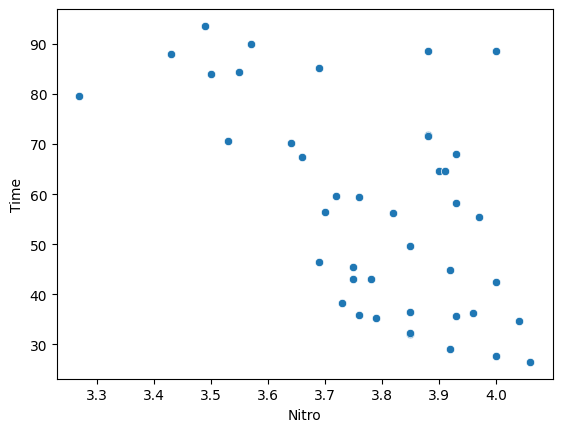

In [14]:
import seaborn as sns
sns.scatterplot(x='Nitro', y='Time', data = longbones)

## Objective - Identify the independent and dependent variables in a relationship

Each of the two variables has a unique role in the relationship.
- The dependent (also known as the target, response or y variable) is the focus of our research question or experiment.  It is the variable we expect to predict.
- The independent (also known as a feature, explanatory or x variable) is used to explain changes in the dependent variable.

In this case, because we want to try to use the nitrogen composition of the long bones of the skeleton to predict the amount of time the body has been buried, **nitrogen is the independent variable and interment time is the dependent variable**.

The classic visualization to show the relationship between two quantitative variables is called a scatterplot.

In a scatterplot, we plot the value of the indepdendent variable and the value of the dependent variable as an (x,y) pair.  

For example, the first observation would be plotted by moving right on the x-axis to 3.88 and up along the y-axis direction to 88.5.

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

From the scatterplot we can see that there is - maybe - a linear relationship between the amount of nitrogen still remaining in the long bones of the skeleton and the length of time the skeleton has been buried.

Before we get too much farther, let's take a look at the data and see if we need to do any additional data cleaning

In [ ]:
#This is a short dataset so we can just print it out look for missing data.



First, the age of the individual at the time of death was unknown in several cases.  

It is good practice to eliminate (or impute - but we'll save that for later) missing data before building a regression model.  Even though all of the records for nitgrogen composition and interment time are complete, later we will want to be able to include age as an independent predictor, and it is missing for some records.

When we build a regression model, it is always important to build it using the same individuals every time.  It's not fair to compare the fit of a model with fewer variables and more observations to a model with more variables and fewer observations (because some of those other variables include missing data).

There is also a variable called Oil that indicates if the burial site was contaminated with fuel oil.  The study authors decided to remove those observations from their analysis because they were concerned that the oil contamination would change the natural relationship between nitrogen composition and interment time.

We can print these observations in a different color on our scatterplot to see if they fall in the general pattern of - or away from the pattern of - the overall relationship between long bone nitrogen compostion and interment time.

<Axes: xlabel='Nitro', ylabel='Time'>

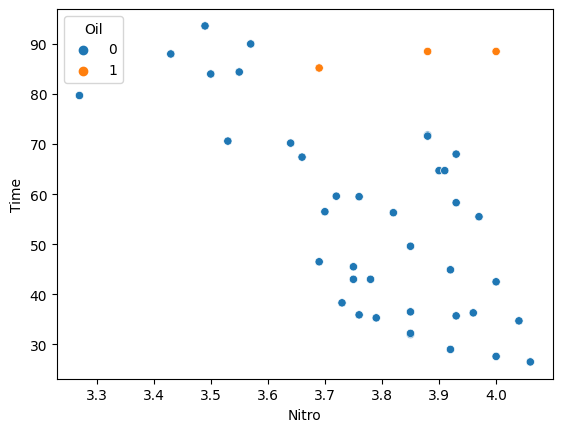

In [15]:
sns.scatterplot(x='Nitro', y='Time', data = longbones, hue='Oil')

Because there is a biological reason that oil contamination might obscure the true relationship between long bone nitrogen composition and interment time, we will remove those observations from our dataset before we begin analyses.

In [16]:
longbones['Oil'].value_counts()

0    39
1     3
Name: Oil, dtype: int64

In [17]:
longbones[longbones['Oil']==1]

,Site,Time,Depth,Lime,Age,Nitro,Oil
0,1,88.5,7.00,1,34.0,3.88,1
1,1,88.5,6.87,1,34.0,4.00,1
2,1,85.2,7.00,1,34.0,3.69,1


In [18]:
mask = longbones[longbones['Oil']==1]
mask.index

Int64Index([0, 1, 2], dtype='int64')

In [19]:
#lets drop these records from our dataFrame
longbones_new = longbones.drop(mask.index)

In [20]:
# now we can see that our new dataFrame starts from the 3rd index
longbones_new.head()

,Site,Time,Depth,Lime,Age,Nitro,Oil
3,1,71.8,7.6,1,65.0,3.88,0
4,1,70.6,7.5,1,42.0,3.53,0
5,1,68.0,7.0,1,28.0,3.93,0
6,1,71.6,8.0,1,35.0,3.88,0
7,1,70.2,6.0,1,44.0,3.64,0


Note that the three oil contaminated gravesites will be removed from the data when we remove the observations with a missing age or burial depth.

Something to point out here - data cleaning isn't only about removing missing data.  Sometimes we don't want to remove records with missing data because they are communicating important information (more on that in Unit 2), and sometimes we want to remove other records for reasons related to the subject matter - as in the case with removing the observations that were contaminated with fuel oil.

In [ ]:
#Drop records with NAs and rename the dataset longbones
#Note: We replaced our NaN values with the mean value of the column

<Axes: xlabel='Nitro', ylabel='Time'>

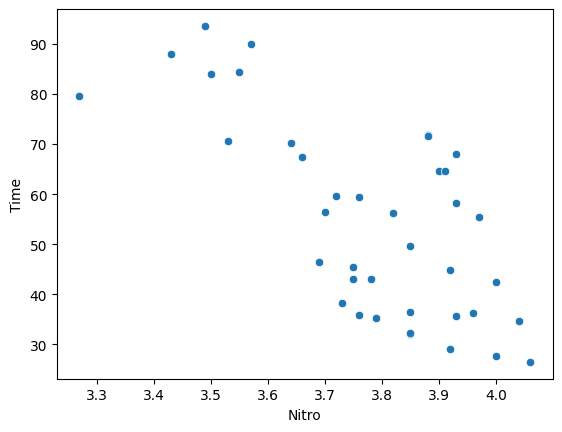

In [21]:
#Let's look at the scatterplot with the cleaned data.

sns.scatterplot(x = 'Nitro', y = 'Time', data=longbones_new)

There appears to be a linear association between long bone nitrogen compostiion and interment time.  More long bone nitrogen composition = lower interment time and vice versa.

But is there a relationship between these two variables?  If so, how strong it is?

## Objective - Calculate and interpret linear correlation

The linear correlation measures the strenght and direction of the linear relationship between two quantitative variables.


- Correlation is measured on a scale of -1 to 1.  -1 = perfect negative correlation, 1 = perfect positive correlation, 0 = no correlation
- Correlation has units
- The correlation of X and Y is equal to the correlation of Y and X
- A correlation |r| > 0.80 is considered strong and a correlation |r| < 0.20 is considered weak.






The formula to calculate correlation is messy and doesn't convey a lot of information on its own.  Instead we'll use the built-in .corrcoef() function in numpy to calculate the correlation between Nitro and Time in our data.  We'll use two methods - one from scipy.stats and one from numpy.

In [22]:
np.corrcoef(longbones_new['Nitro'], longbones_new['Time'])

array([[ 1.        , -0.69613465],
       [-0.69613465,  1.        ]])

In [23]:
import scipy.stats as st
st.pearsonr(longbones_new['Nitro'], longbones_new['Time'])

PearsonRResult(statistic=-0.6961346474722391, pvalue=8.623183825688584e-07)

In [24]:
st.pearsonr(longbones_new['Time'],longbones_new['Nitro'])

PearsonRResult(statistic=-0.6961346474722391, pvalue=8.623183825688584e-07)

np.corrcoef gives us more information than we actually need *for now*.  Right now, it's telling us that the correlation between x and x is 1, and between y and y is 1 (those are the numbers on the diagonal).  The correlation between x and y is -0.70 and the correlation between y and x is -0.70

Later on we'll calculate the correlation between multiple variables simultaneously, and this matrix-type output will make more sense.

Suffice it to say that the linear correlation between nitrogen composition and interrment time is -0.70.  This doesn't quite qualify as a strong correlation |r| > 0.80 but it's not weak either |r| < 0.20.  We'll say it's moderate!

## Objective - Identify linear and nonlinear relationships from a scatterplot

Let's look at some other scatterplot patterns and values of correlation for comparison.

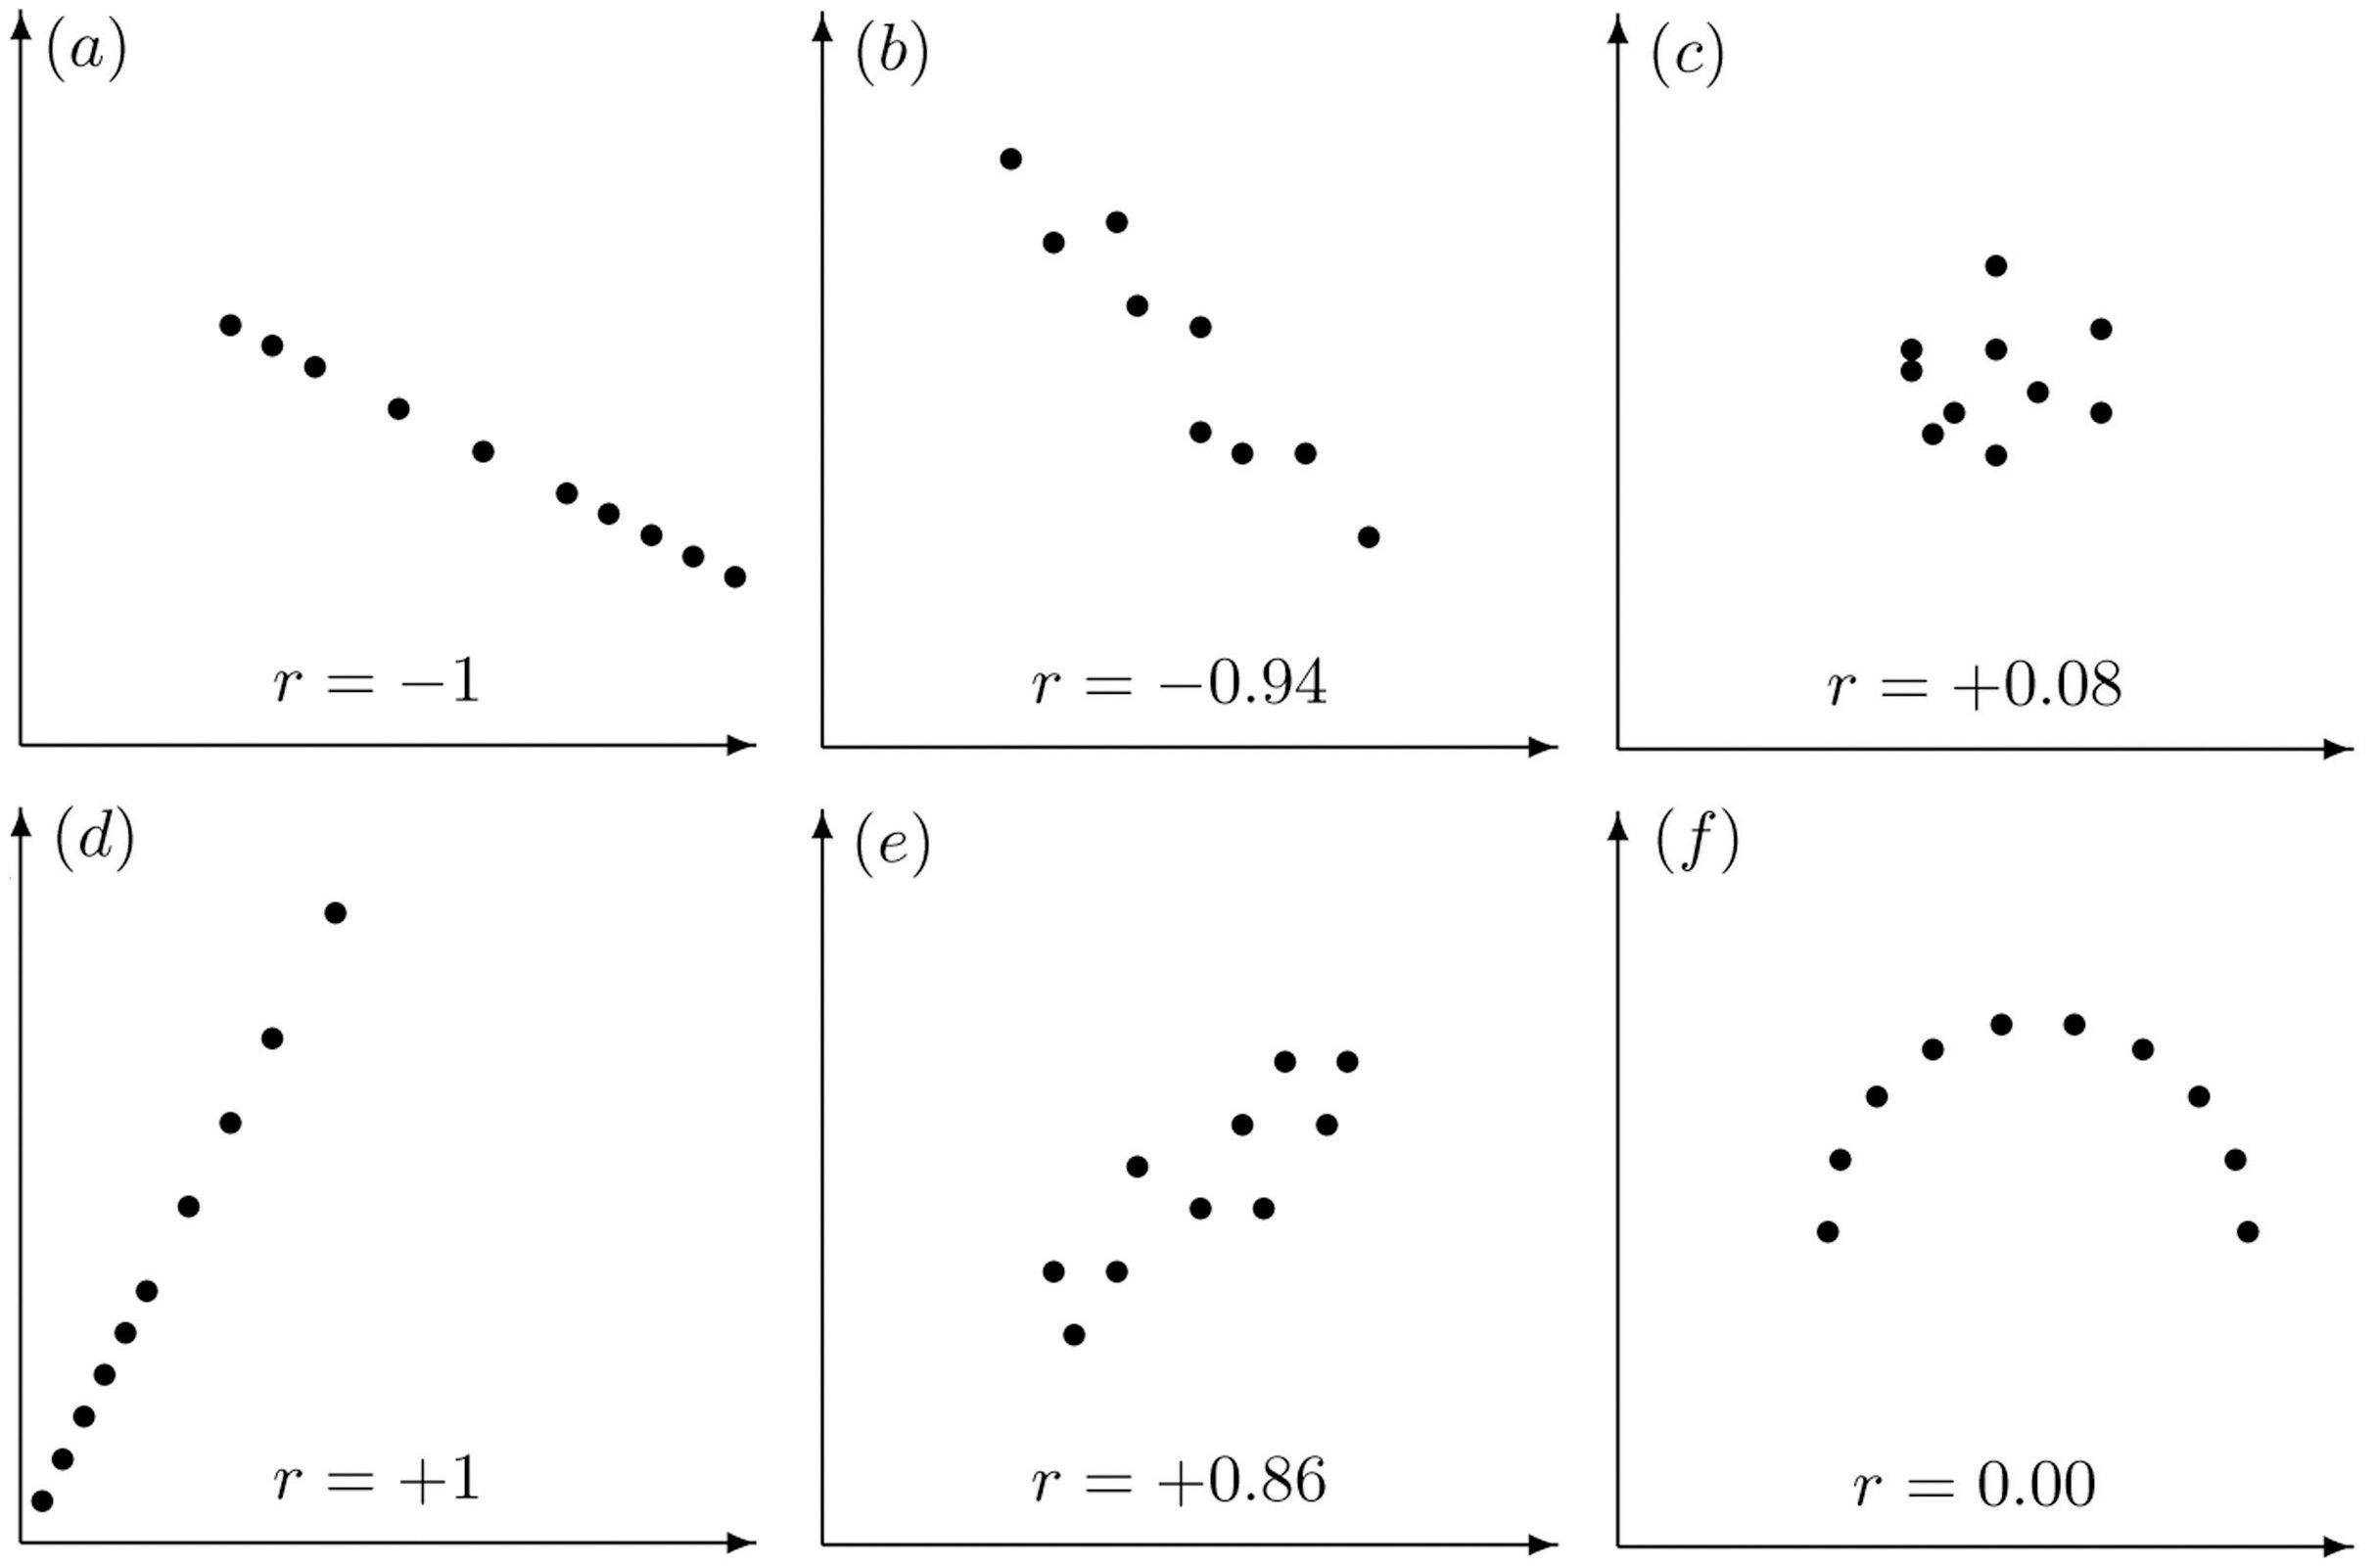

Note that in example f) there does appear to be a relationship between the two variables, it's just not a *linear* relationship, which is why the correlation is 0.

Correlation gives us a measure of how related two quantitative variables are. However, we'd like to go one step further and see if we can use a skeleton's long bone nitrogen composition to estimate how long the body has been buried.

We are going to do this by calculating the least squares regression line (also known as the line of best fit) for the data.



When dealing with real data (as opposed to working with graphs in algebra), the points in a scatterplot will never line up perfectly.  The best model of the relationship between the two variables is the straight line that comes closest to passing through all the points (knowing that it won't actually hit all of them).

The least squares regression line is the line that minimizes the squared distances from every observed point to the regression line.  That fact can be proven mathematically, though we won't do it here.

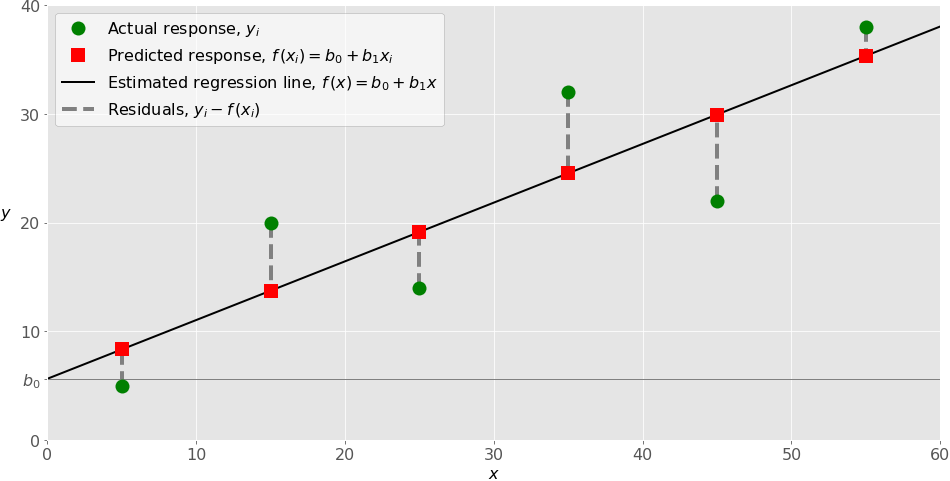

The simple linear regression equation has the form:

\begin{equation}
\hat{Y} = b_0 + b_1 X
\end{equation}

This should look reminiscent of the point-slope form of the equation of a line that you learned way back in algebra.  In that case, you wrote the equation of a line as

\begin{equation}
y = mx + b
\end{equation}

where m was the slope of the line and b was the y-intercept (the place where the line crosses the y-axis).



The simple linear regression model equation also has a slope and intercept, we've just flipped the order: $b_0$ is the intercept and it appears first in the model and $b_1$ is the slope and it appears second.

It is possible to calculate the slope and intercept by hand; however, we will always focus on doing the calculations using Python functions.

# Objective - Calculate and interpret the slope and intercept of a simple linear regression model

To calculate the linear regression model, we need to import a new package and get the data into the correct format.

In [31]:
from statsmodels.formula.api import ols

In [29]:
model = ols('Time ~ Nitro', data=longbones_new).fit()

In [30]:
model.params

Intercept    335.474532
Nitro        -74.255062
dtype: float64

We can write the linear regression model for the relationship between long bone nitrogen composition and length of interment as

$\hat{Y} = 335.47 - 74.26 X$



What do these numbers mean, exactly?  

- The **slope** tells us the unit-value in change from 1 unit to another in the x.
- The **intercept** tells us the expected of Y when X equal to 0.

In this case, we expect interment time to be about 74 years less for every additional gram of nitrogen per 100g of bone remaining in the long bones of the skeleton.

For example, we would expect a skeleton with 3g of nitrogen per 100g of bone to have been buried about 74.26 years longer than a skeleton with 4g of nitrogen per 100g of bone.

We need the intercept to make the regression equation work mathematically, but we don't often interpret it.  It *only* makes sense to interpret the intercept if the value of x=0 is relavant to us.

In this case, 0 was not an x-value in the dataset, so it does not make sense to interpret the intercept.

We can overlay the regression line on top of our scatterplot to get a sense of how the obseved data points vary around it.

<Axes: xlabel='Nitro', ylabel='Time'>

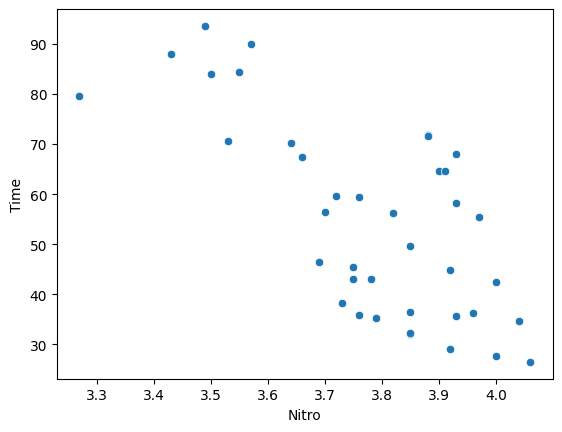

In [32]:

sns.scatterplot(x='Nitro', y= 'Time', data = longbones_new)

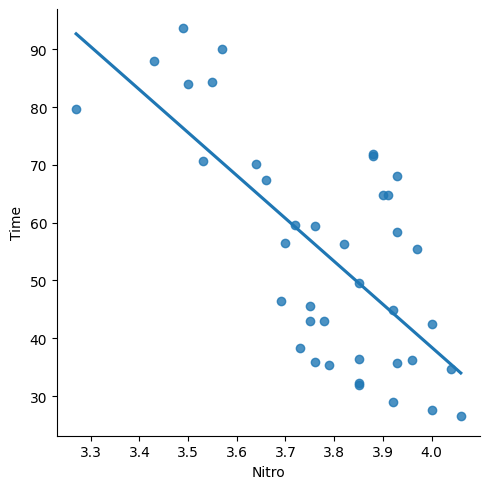

In [33]:
sns.lmplot(x='Nitro', y = 'Time', data=longbones_new, ci= None)

#Objective - Predict a response from a simple linear regression model

A body is discovered buried in a field.  The medical examiner's report indicates the long bones of the skeleton contain 3.65 g of nitrogen per 100g of bone.  Estimate how long the body has been buried.

In [34]:
model.params

Intercept    335.474532
Nitro        -74.255062
dtype: float64

In [35]:
intercept, slope = model.params

In [36]:
print(intercept, slope)

335.47453228924303 -74.25506208839799


In [38]:
x = 3.65
#b + mx
prediction = intercept + (slope * x)
prediction

64.44355566659038

If a skeleton is found with 3.65g of nitrogen per 100g of long bone remaining, we believe that it has been buried for about 64 years.

#Objective - Calculate and interpret a residual

A model **residual** is the difference between the observed and predicted values for a particular data point.

Let's calculate the model residual for for the first observation in the dataset.

In [39]:
longbones_new.loc[3]

Site      1.00
Time     71.80
Depth     7.60
Lime      1.00
Age      65.00
Nitro     3.88
Oil       0.00
Name: 3, dtype: float64

In [40]:
x = 3.88
#b + mx
prediction = intercept + (slope * x)
prediction

47.36489138625882

In [41]:
observed = 71.80
residual = observed - prediction
residual

24.43510861374118

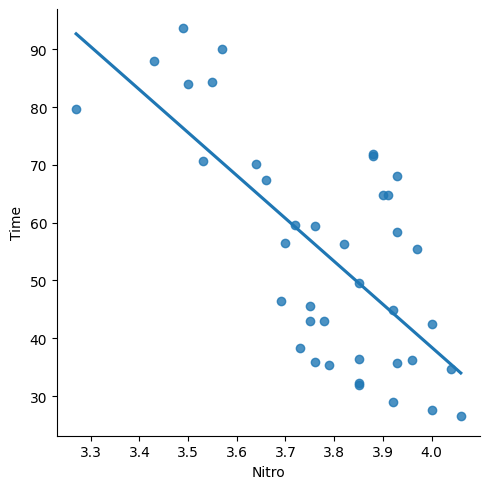

In [42]:
sns.lmplot(x='Nitro', y = 'Time', data=longbones_new, ci= None)

We can see that our model *underestimated* the true interment time for that skeleton by about 24.4 years.

Some model residuals will be smaller and some larger than others.

Which leads us to...


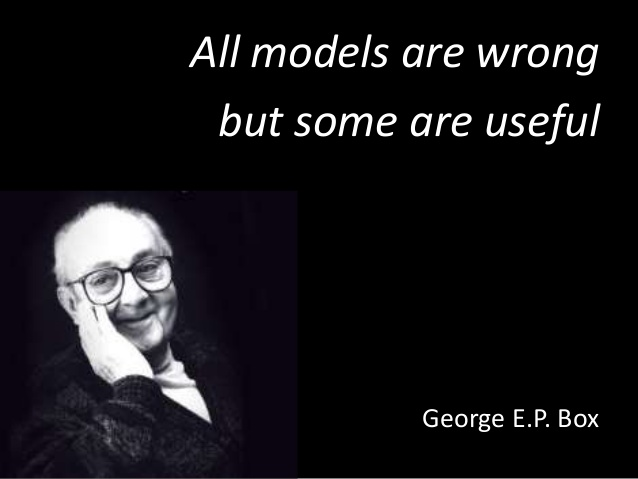

Keep in mind that our goal is to build the best, most useful model that we can - not to make perfect predictions

#Let's look at another example.

Import the Sleep.csv dataset from a URL and print the first few rows

Researchers recorded data on sleep duration as well as a set of ecological and constitutional variables  for a selection of mammal species. This data appears in the Sleep.csv dataset.


Source: Allison, T. and Cicchetti, D. (1976), "Sleep in Mammals: Ecological and Constitutional Correlates",  Science, November 12, vol. 194, pp. 732-734.



Data Dictionary:

| Variable Name |            Description           |                                                                 Details                                                                 |              |   |
|:-------------:|:--------------------------------:|:---------------------------------------------------------------------------------------------------------------------------------------:|--------------|---|
| Animal        |            Animal name           |                                                            Character [string]                                                           |    |   |
| Body          |            Body weight           |                                                               Numeric [kg]                                                              |       |   |
| Brain         |           Brain weight           |                                                               Numeric [g]                                                               |  |   |
| SWsleep       | Slow wave (“non-dreaming”) sleep | Numeric [hours]                                                                                                                         |              |   |
| Parasleep     | Paradoxical (“dreaming”) sleep   | Numeric [hours]                                                                                                                         |              |   |
| Totsleep      | Total sleep                      | Numeric [hours]                                                                                                                         |              |   |
| Life          | Maximum life expectancy          | Numeric [years]                                                                                                                         |              |   |
| Gest          | Gestation time                   | Numeric [days]                                                                                                                          |              |   |
| Pred          | Predation index                  | Numeric [1 – 5] 1 = least likely to be preyed upon, 5 = most likely to be preyed upon                                                   |              |   |
| Exposure      | Sleep exposure index             | Numeric [1 – 5] 1 = least amount of exposure during sleep (mammal sleeps indoors or in a den), 5 = most amount of exposure during sleep |              |   |
| Danger        | Overall danger index             | Numeric [ 1 – 5] 1 = least amount of danger from other animals, 5 = most amount of danger from other animals                            |              |   |



In [43]:
data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Sleep/Sleep.csv'

sleep = pd.read_csv(data_url, skipinitialspace=True, header=0)

sleep.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4


How is time spent in dreaming and non-dreaming sleep related?  Do both increase together (i.e. Do mammals that sleep more get both more dreaming and non-dreaming sleep?)?  Or does a mammal that spends more time in dreaming sleep experience less non-dreaming sleep and vice versa.

Let's begin by plotting dreaming and non-dreaming sleep.  We could choose either to be the explanatiory variable, but we'll go with using non-dreaming sleep time to predict dreaming sleep time.

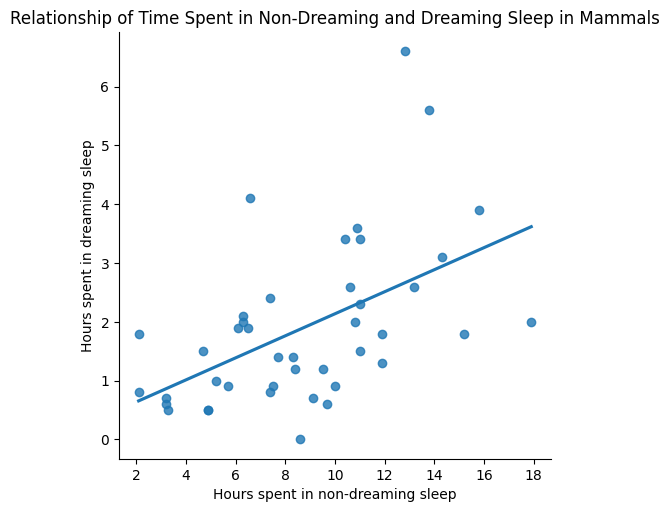

In [47]:
sns.lmplot(x = 'SWsleep', y='Parasleep', data = sleep, ci= None)

plt.title('Relationship of Time Spent in Non-Dreaming and Dreaming Sleep in Mammals')
plt.xlabel('Hours spent in non-dreaming sleep')
plt.ylabel('Hours spent in dreaming sleep')


plt.show()

Looks like there is a positive, possibly linear relationship between the two.  Both dreaming and non-dreaming sleep rise together.

Let's calculate the correlation between the two.

In [48]:
st.pearsonr(sleep['SWsleep'], sleep['Parasleep'])

PearsonRResult(statistic=0.5182428682301412, pvalue=0.00043883313686808535)

Calculate the LS regression coefficients

In [52]:
model = ols("Parasleep ~ SWsleep", data = sleep).fit()
model.params

Intercept    0.260215
SWsleep      0.187557
dtype: float64

We can write the linear regression model for the relationship between long bone nitrogen composition and length of interment as

$\hat{Y} = 0.26 + 0.19X$


We can overlay the regression line on top of our scatterplot to get a sense of how the observed data points vary around it.

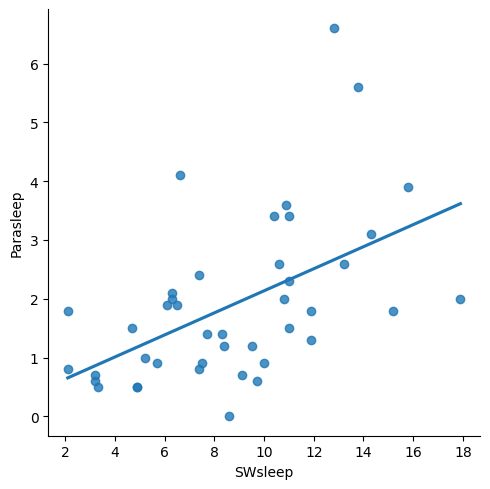

In [53]:
sns.lmplot(x = 'SWsleep', y='Parasleep', data = sleep, ci= None)





---



Humans spend about 6 hours per night in non-dreaming sleep and 2 hours in dreaming sleep.  According to this model, how many hours of dreaming sleep do we get?  What is the residual?

In [56]:
#Specify the value of x we'd like to predict
x= 6

#Extract the slope and intercept values from the model paramters
intercept = model.params[0]
slope = model.params[1]

#Use the model coefficients and plug the new value of x into the regression equation
predict = intercept + slope*x

print('Prediction: ', predict)

#Specify the actual value of y
y = 2

#Calculate the resuidual y - y-hat
residual = y - predict
print('Residual: ', residual)

Prediction:  1.3855577166058581
Residual:  0.6144422833941419
